In [6]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from uncertainties import ufloat, ufloat_fromstr
from sklearn.linear_model import LinearRegression
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#I = m * (2 * 9.8 * k - (r**2))

xaxis = 'Height'
yaxis = '$\overline{t}$'

## Part 1

In [59]:
m30d = {xaxis : [i for i in [80] * 4] + [i for i in [70] * 4] + [i for i in [60] * 4] + [i for i in [50] * 4] + [i for i in [40] * 4] + [i for i in [30] * 4],
       yaxis : [0.1303, 0.1323, 0.1320, 0.1360,
                        0.1380, 0.1403, 0.1400, 0.1444,
                        0.1512, 0.1527, 0.1538, 0.1595,
                        0.1613, 0.1644, 0.1646, 0.1703,
                        0.1783, 0.1819, 0.1824, 0.1894,
                        0.2091, 0.2127, 0.2159, 0.2267]
            }
m30 = pd.DataFrame(m30d)
m30 = m30.groupby([xaxis], as_index = False).mean()
m30['T'] = m30[yaxis] * 8
m30["$\omega^2$"] = (4 * (np.pi ** 2))/ ((m30["T"]) ** 2)
m30

,Height,$\overline{t}$,T,$\omega^2$
0,30,0.216100,1.7288,13.209009
1,40,0.183000,1.4640,18.419489
2,50,0.165150,1.3212,22.616355
3,60,0.154300,1.2344,25.908837
4,70,0.140675,1.1254,31.170654
5,80,0.132650,1.0612,35.056234


In [3]:
print(m30.to_latex(index=True, escape=False, caption="Table of $h$ vs $\omega^2$ for $m=30g$")) # Do you want to show index in table?

\begin{table}
\centering
\caption{Table of $h$ vs $\omega^2$ for $m=30g$}
\begin{tabular}{lrrrr}
\toprule
{} &  Height &  $\overline{t}$ &       T &  $\omega^2$ \\
\midrule
0 &      30 &        0.216100 &  1.7288 &   13.209009 \\
1 &      40 &        0.183000 &  1.4640 &   18.419489 \\
2 &      50 &        0.165150 &  1.3212 &   22.616355 \\
3 &      60 &        0.154300 &  1.2344 &   25.908837 \\
4 &      70 &        0.140675 &  1.1254 &   31.170654 \\
5 &      80 &        0.132650 &  1.0612 &   35.056234 \\
\bottomrule
\end{tabular}
\end{table}



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

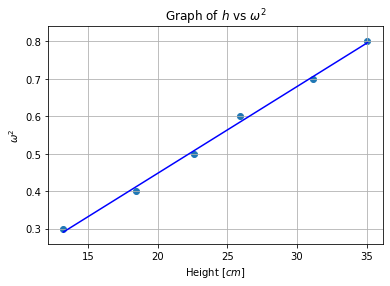

In [60]:
X = np.array(m30['$\omega^2$']).reshape(-1, 1)
Y = np.array(m30[xaxis]/100).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
I = (30/1000) * (2 * 9.8 * coef - ((22.54/1000)**2))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.xlabel("Height [$cm$]")
plt.ylabel("$\omega^2$")
plt.title("Graph of $h$ vs $\omega^2$")
plt.grid()
plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f} $kgm^2$".format(I[0, 0])))

In [27]:
m30.sem()

Height            7.637626
$\overline{t}$    0.012500
T                 0.099999
$\omega^2$        3.295754
dtype: float64

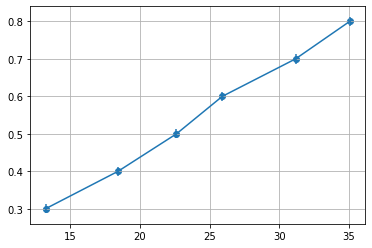

In [56]:
plt.scatter(X, Y)
plt.errorbar(X, Y, yerr=m30.sem(axis=0)[1]) #plots error bar in terms of std of t, i.e 0.012500
plt.grid()                                  # That means this can be used for statistical error calculation.

In [49]:
m30.sem(axis=0)[1]

0.012499819582031313

In [5]:
m60d = {'Height [$cm$]': [i for i in [80] * 4] + [i for i in [70] * 4] + [i for i in [60] * 4] + [i for i in [50] * 4] + [i for i in [40] * 4] + [i for i in [30] * 4],
      '$\overline{t} [s]$': [0.0867, 0.0874, 0.0870, 0.0885,
                        0.0931, 0.0939, 0.0934, 0.0952,
                        0.1001, 0.1005, 0.1010, 0.1035,
                        0.1092, 0.1098, 0.1105, 0.1132,
                        0.1214, 0.1221, 0.1231, 0.1264,
                        0.1376, 0.1396, 0.1395, 0.1433,
                        ]
            }
m60 = pd.DataFrame(m60d)
m60 = m60.groupby(['Height [$cm$]'], as_index = False).mean()
m60['T [$s$]'] = m60['$\overline{t} [s]$'] * 8
m60["$\omega^2$"] = (4 * (np.pi ** 2))/ ((m60["T [$s$]"]) ** 2)
m60

,Height [$cm$],$\overline{t} [s]$,T [$s$],$\omega^2$
0,30,0.140000,1.1200,31.471953
1,40,0.123250,0.9860,40.607468
2,50,0.110675,0.8854,50.359418
3,60,0.101275,0.8102,60.141639
4,70,0.093900,0.7512,69.959803
5,80,0.087400,0.6992,80.752671


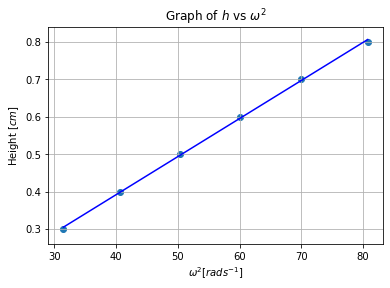

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
X = np.array(m60['$\omega^2$']).reshape(-1, 1)
Y = np.array(m60["Height [$cm$]"]/100).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
I = (60/1000) * (2 * 9.8 * coef - ((22.54/1000)**2))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.ylabel("Height [$cm$]")
plt.xlabel("$\omega^2 [rads^{-1}]$")
plt.title("Graph of $h$ vs $\omega^2$")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f} $kgm^2$".format(I[0, 0])))

In [62]:
m90d = {'Height [$cm$]': [i for i in [80] * 4] + [i for i in [70] * 4] + [i for i in [60] * 4] + [i for i in [50] * 4] + [i for i in [40] * 4] + [i for i in [30] * 4],
      '$\overline{t} [s]$': [0.0696, 0.0697, 0.0698, 0.0712,
                        0.0734, 0.074, 0.0735, 0.0749,
                        0.08, 0.0801, 0.0804, 0.0820,
                        0.087, 0.0874, 0.0873, 0.0895,
                        0.0953, 0.0963, 0.0957, 0.0981,
                        0.1101, 0.1114, 0.1110, 0.1139]
            }
m90 = pd.DataFrame(m90d)
m90 = m90.groupby(['Height [$cm$]'], as_index = False).mean()
m90['T [$s$]'] = m90['$\overline{t} [s]$'] * 8
m90["$\omega^2$"] = (4 * (np.pi ** 2))/ ((m90["T [$s$]"]) ** 2)
m90

,Height [$cm$],$\overline{t} [s]$,T [$s$],$\omega^2$
0,30,0.111600,0.8928,49.528066
1,40,0.096350,0.7708,66.447145
2,50,0.087800,0.7024,80.018560
3,60,0.080625,0.6450,94.894340
4,70,0.073950,0.5916,112.798521
5,80,0.070075,0.5606,125.618485


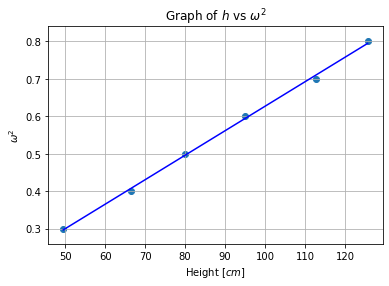

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
X = np.array(m90['$\omega^2$']).reshape(-1, 1)
Y = np.array(m90["Height [$cm$]"]/100).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
I = (90 /1000) * (2 * 9.8 * coef - ((22.54/1000)**2))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.xlabel("Height [$cm$]")
plt.ylabel("$\omega^2$")
plt.title("Graph of $h$ vs $\omega^2$")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f} $kgm^2$".format(I[0, 0])))

## Part 4

In [10]:
pred = {'$T$': [i for i in [24.4-4.4] * 4] + [i for i in [18.7-1.7] * 4] + [i for i in [15.8-1.1] * 4] + [i for i in [25.3-2.9] * 4] + [i for i in [26.3-2.8] * 4] + [i for i in [25.6-4.1] * 4] + [i for i in [15.7-1.7] * 4] + [i for i in [17.9-4.6] * 4],
       '$T_1$': [0.0175, 0.0176, 0.0178, 0.0178,
             0.0214, 0.0217, 0.0216, 0.0216,
             0.0255, 0.0257, 0.0262, 0.0265,
             0.0153, 0.0155, 0.0155, 0.0153,
             0.0144, 0.0147, 0.0145, 0.0143,
             0.0168, 0.0165, 0.0167, 0.0167,
             0.0270, 0.027, 0.0275, 0.0278,
             0.0291, 0.0294, 0.0292, 0.0291],
       '$T_2$': [0.0271, 0.0272, 0.0272, 0.0273,
             0.0315, 0.032, 0.0314, 0.0317,
             0.0368, 0.0366, 0.0372, 0.0369,
             0.0247, 0.0245, 0.0249, 0.0246,
             0.0234, 0.0233, 0.0239, 0.0237,
             0.0262, 0.0256, 0.0256, 0.0259,
             0.0384, 0.038, 0.038, 0.0381,
             0.0407, 0.0409, 0.0406, 0.0404]}
p20 = pd.DataFrame(pred)
p20 = p20.groupby(['$T$'], as_index = False).mean()
p20['$T_p$'] = p20['$T$'] * 2
p20['$T_{r1}$'] = p20['$T_1$'] * 8
p20['$T_{r2}$'] = p20['$T_2$']
p20

,$T$,$T_1$,$T_2$,$T_p$,$T_{r1}$,$T_{r2}$
0,13.3,0.029200,0.040650,26.6,0.2336,0.040650
1,14.0,0.027325,0.038125,28.0,0.2186,0.038125
2,14.7,0.025975,0.036875,29.4,0.2078,0.036875
3,17.0,0.021575,0.031650,34.0,0.1726,0.031650
4,20.0,0.017675,0.027200,40.0,0.1414,0.027200
5,21.5,0.016675,0.025825,43.0,0.1334,0.025825
6,22.4,0.015400,0.024675,44.8,0.1232,0.024675
7,23.5,0.014475,0.023575,47.0,0.1158,0.023575


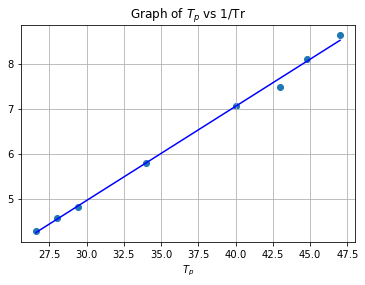

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
X = np.array(p20['$T_p$']).reshape(-1, 1)
Y = np.array(1/p20["$T_{r1}$"]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
m = 20/1000
g = 9.8
r = 26/100
I = (m * g * r) / (4 * (np.pi ** 2) * coef)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.title("Graph of $T_p$ vs 1/Tr")
plt.xlabel("$T_p$")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f}".format(I[0, 0])))

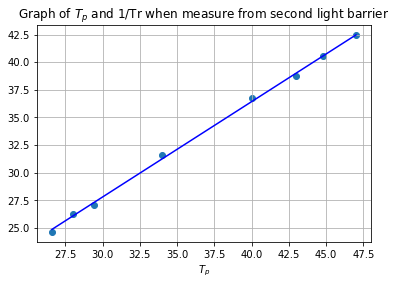

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
X = np.array(p20['$T_p$']).reshape(-1, 1)
Y = np.array(1/p20["$T_{r2}$"]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
m = 20/1000
g = 9.8
r = 26/100
I = (m * g * r) / (4 * (np.pi ** 2) * coef)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.xlabel("$T_p$")
plt.title("Graph of $T_p$ and 1/Tr when measure from second light barrier")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f} $kgm^2$".format(I[0, 0])))

## Part 5

## Error Analysis

In [10]:
r = ufloat(14, 0)
m = ufloat(0.03, 0.01)
e = r / m
print(e)

(4.7+/-1.6)e+02


In [3]:
pred40 = {'$T$': [i for i in [24.5-4.5] * 4] + [i for i in [18.8-1.8] * 4] + [i for i in [15.9-1.2] * 4] + [i for i in [25.4-3] * 4] + [i for i in [26.4-2.9] * 4] + [i for i in [25.7-4.3] * 4] + [i for i in [15.8-1.8] * 4] + [i for i in [18-4.7] * 4],
       '$T_1$': [0.0175, 0.0176, 0.0178, 0.0178, 
                 0.0214, 0.0217, 0.0216, 0.0216,
                 0.0255, 0.0258, 0.0262, 0.0265,
                 0.0153, 0.0154, 0.0155, 0.0153,
                0.0144, 0.0147, 0.0145, 0.0143,
                 0.0168, 0.0165, 0.0167, 0.0167,
                 0.0270, 0.027, 0.0275, 0.0278,
                 0.0291, 0.0294, 0.0292, 0.0291],
       '$T_2$': [0.0271, 0.0272, 0.0272, 0.0273,
                0.032, 0.0314, 0.0317, 0.0322,
                0.0366, 0.0372, 0.0369, 0.0368,
                0.0247, 0.0245, 0.0249, 0.0246,
                0.0234, 0.0233, 0.0239, 0.0237,
                0.0262, 0.026, 0.026, 0.0259,
                0.0377, 0.0384, 0.038, 0.038,
                0.0407, 0.0409, 0.0406, 0.0404]}
p40 = pd.DataFrame(pred40)
p40['$T_{r2}$'] = p40['$T_2$'] * 8
p40 = p40.groupby(['$T$'], as_index = False).mean()
p40['$T_p$'] = p40['$T$'] * 2
p40['$T_{r1}$'] = p40['$T_1$'] * 8
p40

,$T$,$T_1$,$T_2$,$T_{r2}$,$T_p$,$T_{r1}$
0,13.3,0.029200,0.040650,0.3252,26.6,0.2336
1,14.0,0.027325,0.038025,0.3042,28.0,0.2186
2,14.7,0.026000,0.036875,0.2950,29.4,0.2080
3,17.0,0.021575,0.031825,0.2546,34.0,0.1726
4,20.0,0.017675,0.027200,0.2176,40.0,0.1414
5,21.4,0.016675,0.026025,0.2082,42.8,0.1334
6,22.4,0.015375,0.024675,0.1974,44.8,0.1230
7,23.5,0.014475,0.023575,0.1886,47.0,0.1158


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

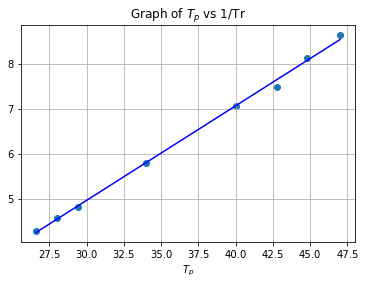

In [78]:
X = np.array(p40['$T_p$']).reshape(-1, 1)
Y = np.array(1/p40["$T_{r1}$"]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
m = 20/1000
g = 9.8
r = 26/100
I = (m * g * r) / (4 * (np.pi ** 2) * coef)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.title("Graph of $T_p$ vs 1/Tr")
plt.xlabel("$T_p$")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f}".format(I[0, 0])))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

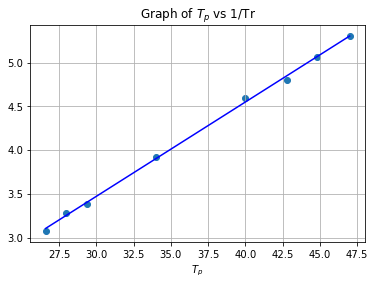

In [5]:
X = np.array(p40['$T_p$']).reshape(-1, 1)
Y = np.array(1/p40["$T_{r2}$"]).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
Y_pred = reg.predict(X)
reg_value = reg.score(X, Y)
intercept = reg.intercept_
coef = reg.coef_
m = 20/1000
g = 9.8
r = 26/100
I = (m * g * r) / (4 * (np.pi ** 2) * coef)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue')
plt.title("Graph of $T_p$ vs 1/Tr")
plt.xlabel("$T_p$")
plt.grid()
#plt.show()
display(Latex("$R^2$ = {}".format(reg_value)))
display(Latex("$f(x) = {}x {}$".format(coef[0, 0], intercept[0])))
display(Latex("$I$ = {:10.4f}".format(I[0, 0])))